In [ ]:
#importing important libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt


In [ ]:
#load and see first five rows of datasets
df = pd.read_csv('/content/sample_data/pima-indians-diabetes.data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#choosing X and y
X = df.drop(8, axis = 1)
y = df[8]

In [ ]:
#scaling the data
from sklearn.preprocessing import scale
X = scale(X)

In [ ]:
#spiltting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#one hot encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)

In [ ]:
#Defining and desining neural network model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
# Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# training model
history = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
52/52 [==============================] - 1s 2ms/step - loss: 0.6790 - accuracy: 0.6381
Epoch 2/150
52/52 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6576
Epoch 3/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.6809
Epoch 4/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7062
Epoch 5/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7315
Epoch 6/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7588
Epoch 7/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7724
Epoch 8/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7821
Epoch 9/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7840
Epoch 10/150
52/52 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7724
Epoch 11/

In [ ]:
#prediction and evalution
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy_score(y_test, y_pred)

0.7322834645669292

Text(0.5, 0, 'epoch')

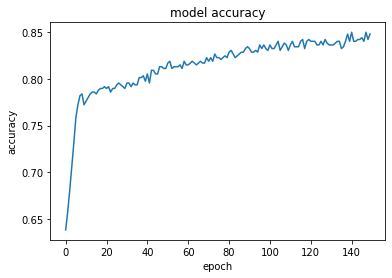

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

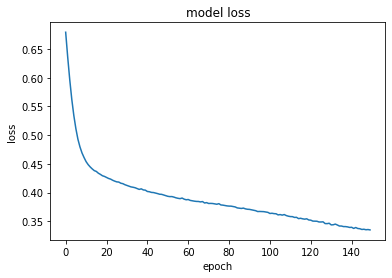

In [ ]:
#plotting loss against no. of epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')